## 必要のない値(一時的な変数)の代入先としての「 _ 」（アンダースコア）

In [16]:
def func1(a,b,c):
    ret1 = a * 10
    ret2 = b * 100
    ret3 = c * 1000
    # 戻り値（3つの値をreturnする）
    return ret1, ret2, ret3

# 関数test1の呼び出し
# 3つすべての戻り値を受け取りたい場合
x,y,z = func1(1,2,3)

print('x=',x)
print('y=',y)
print('z=',z)

# 二個目の値は必要ないが、func1の機能を呼び出したい場合
# 必要ない戻り値を変数にせず、「_（アンダースコア）」にする
o,_,q = func1(1,2,3)
print('o,q=',o,q)

x= 10
y= 200
z= 3000
o,q= 10 3000


In [15]:
# camera-sample.py

import cv2
import numpy as np

# Webカメラから入力を開始
# VideoCaptureをインスタンス化して、capという名前で使えるようにしている
cap = cv2.VideoCapture(0)
while True:
    # カメラの画像を読み込む
    # # capインスタンス化から、readメソッドを呼び出し実行
    _, frame = cap.read()
    # 画像を縮小表示する
    frame = cv2.resize(frame, (500, 300))
    # ウィンドウに画像を出力
    cv2.imshow('Opencv Web Camera', frame)
    # ESCかEnterキーが押されたらループを抜ける
    k = cv2.waitKey(1) # 1msec確認
    if  k == 27 or k == 13:break
        
cap.release() # カメラを開放
cv2.destroyAllWindows() # ウィンドウを破棄

In [28]:
# red_camera.py
import cv2
import numpy as np

# Webカメラから入力を開始
# VideoCaptureをインスタンス化して、capという名前で使えるようにしている
cap = cv2.VideoCapture(0)
while True:
    # 画像を取得
    _, frame = cap.read()
    # 画像を縮小表示
    frame = cv2.resize(frame, (500, 300))
    # 青色と緑色の成分を0に（Numpyのインデクスを利用）
    frame[:, :, 0] = 0 # 青色要素を0
    frame[:, :, 1] = 0 # 緑色要素を0
    # ウィンドウに画像を出力
    cv2.imshow('RED Camera', frame)
    # Enterキーが押されたらループを抜ける
    if cv2.waitKey(1) == 13:break
        
cap.release() # カメラを開放
cv2.destroyAllWindows() # ウィンドウを破棄

## HSV色相環とは？

https://ja.wikipedia.org/wiki/HSV%E8%89%B2%E7%A9%BA%E9%96%93

https://www.peko-step.com/html/hsv.html

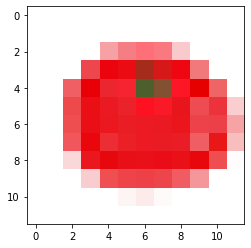

hsv = [[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [254  87 246]
  [254 123 244]
  [253 144 255]
  [254 132 250]
  [254  49 249]
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  [254 179 237]
  [254 252 235]
  [254 243 234]
  [  5 213 165]
  [  0 227 215]
  [254 249 238]
  [255 127 241]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [255 154 240]
  [255 255 233]
  [254 214 236]
  [254 218 246]
  [ 58 137  95]
  [ 16 158 131]
  [253 233 253]
  [  0 255 231]
  [  0 147 239]
  [  0   0 255]]

 [[  0   0 255]
  [128  

In [29]:
# 色空間をHSVに変換

import matplotlib.pyplot as plt
import cv2
img = cv2.imread("tomato.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# hsvの出力形式
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
print('hsv =',hsv)

h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

print('■■■■■■h =\n',h)
print('■■■■■■s =\n',s)
print('■■■■■■v =\n',v)

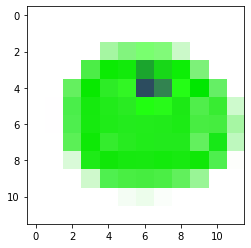

In [30]:
# hsvを操作すると、色相、彩度などの変更が簡単！
# トマトの画像を緑にする

import cv2 # OpenCVのインポート
img = cv2.imread('tomato.png') # 画像の読み出し

img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) # 色空間をBGRからHSVに変換

h_deg = 60 #色相(Hue)の回転度数→+60
s_mag = 1 # 彩度(Saturation)の倍率
v_mag = 1 # 明度(Value)の倍率

img_hsv[:,:,0] = img_hsv[:,:,(0)]+h_deg # 色相の計算
img_hsv[:,:,1] = img_hsv[:,:,(1)]*s_mag # 彩度の計算
img_hsv[:,:,2] = img_hsv[:,:,(2)]*v_mag # 明度の計算
img_bgr = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR) # 色空間をHSVからBGRに変換
 
cv2.imwrite('tomato_hue.png', img_bgr) # 画像の保存
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
# red_camera_hsv.py

import cv2
import numpy as np

# Webカメラから入力を開始
cap = cv2.VideoCapture(0)
while True:
    # 画像を取得して縮小する
    _, frame = cap.read()
    # 画像を縮小表示
    frame = cv2.resize(frame, (500, 300))
    # 色空間をHSVに変換
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV_FULL)
    # HSVを分割する
    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    v = hsv[:, :, 2]
    
    # 赤っぽい色を持つ画像だけを抽出
    img = np.zeros(h.shape, dtype=np.uint8)
    img[((h < 50)|(h > 200)) & (s > 100)] = 255
    # ウィンドウに画像を出力
    cv2.imshow('RED Camera', img)
    # Enterキーが押されたらループを抜ける
    if cv2.waitKey(1) == 13:break
        
cap.release() # カメラを開放
cv2.destroyAllWindows() # ウィンドウを破棄

In [10]:
# diff_camera.py

import cv2

cap = cv2.VideoCapture(0)
img_last = None # 前回の画像を記憶する変数
# 線の色の定義
green = (0, 255, 0)

while True:
    # 画像を取得
    _, frame = cap.read()
    frame = cv2.resize(frame, (500, 300))
    # 白黒画像に変換
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 0)
    img_b = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    # 差分を確認する
    if img_last is None:
        img_last = img_b
        continue
    frame_diff = cv2.absdiff(img_last, img_b)
    cnts = cv2.findContours(frame_diff, 
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)[0]
    # 差分があった点を画面に描く
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if w < 30: continue # 小さな変更点は無視
        cv2.rectangle(frame, (x, y), (x+w, y+h), green, 2)
    # 今回のフレームを保存
    img_last = img_b
    # 画面に表示
    #(２画面表示されます！！)
    cv2.imshow("Diff Camera", frame)
    cv2.imshow("diff data", frame_diff)
    if cv2.waitKey(1) == 13: break
cap.release()
cv2.destroyAllWindows()

In [11]:
import numpy as np
img = np.zeros((3,3), dtype=np.uint8)
h = np.array([[0,0,65],
    [0,65,0],
    [0,300,0]])
s = np.array([[0,0,0],
    [0,0,0],
    [0,120,0]])
img[((h<50) | (h>200)) & (s>100)] = 255
img

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0, 255,   0]], dtype=uint8)